In [20]:
import psycopg2
import pandas as pd
from contextlib import closing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import datetime as dt
from datetime import datetime, time, timedelta
import warnings
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [21]:
df = pd.read_csv('../datasets/vrms.csv')
df.head()

,Unnamed: 0,date,vrms_vib1_avg
0,0,1627776068000,1.52625
1,1,1627776128000,1.51868
2,2,1627776188000,1.49958
3,3,1627776248000,1.52360
4,4,1627776308000,1.52461


In [22]:
df = df[['date', 'vrms_vib1_avg']]

In [23]:
# Замена пустых значений на ноль
df = df.fillna(0)

In [24]:
df.head()

,date,vrms_vib1_avg
0,1627776068000,1.52625
1,1627776128000,1.51868
2,1627776188000,1.49958
3,1627776248000,1.52360
4,1627776308000,1.52461


In [25]:
# Перевод даты из UNIX в формат yyyy-mm-dd hh-mm-ss
df['date'] = pd.to_datetime(df['date'], unit='ms')

In [26]:
# Плюс 6 часов для перевода на часовой пояс Алматы
df['date'] = df['date'] + pd.Timedelta('06:00:00')

In [27]:
# Установка даты и времени в качестве индекса
df = df.set_index('date')

In [28]:
df = df.sort_index()

In [29]:
df.tail()

,vrms_vib1_avg
date,
2021-10-23 15:36:07,1.25793
2021-10-23 15:37:07,1.25856
2021-10-23 15:38:07,1.25855
2021-10-23 15:39:07,1.25389
2021-10-23 15:40:07,1.23967


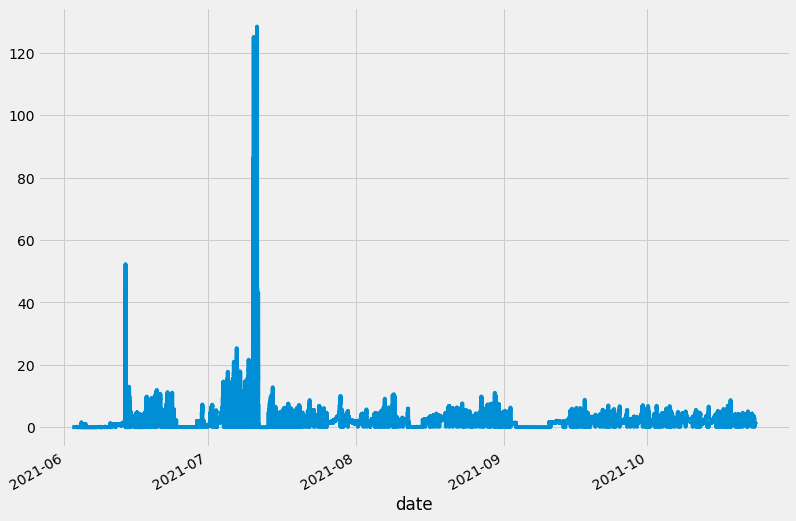

In [30]:
plt.figure(figsize=(12, 9))
df['vrms_vib1_avg'].plot();

In [31]:
y = df['2021-07-15':'2021-07-31'].resample('10min').mean()

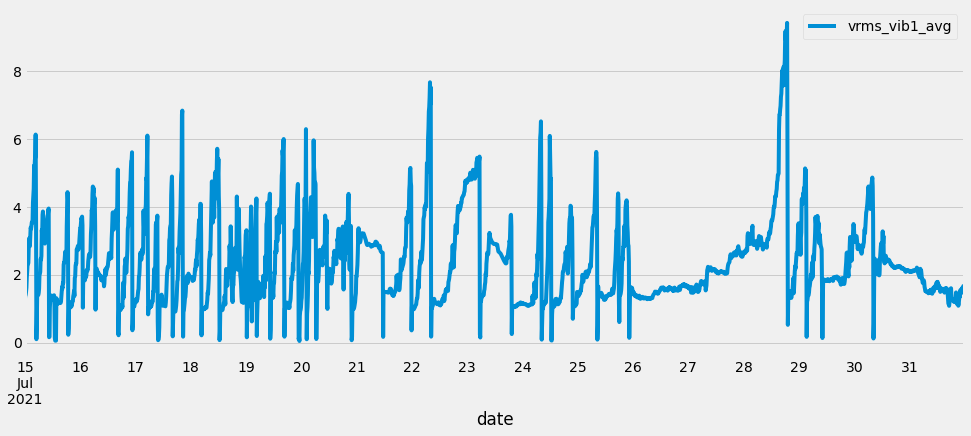

In [33]:
y.plot(figsize=(15, 6))
plt.show()

In [34]:
# Определите p, d и q в диапазоне 0-2
p = range(14, 16)
d = range(1, 2)
q = range(51, 57)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {}'.format(pdq[1]))
print('SARIMAX: {}'.format(pdq[2]))
print('SARIMAX: {}'.format(pdq[3]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (14, 1, 52)
SARIMAX: (14, 1, 53)
SARIMAX: (14, 1, 54)


In [35]:
warnings.filterwarnings("ignore") # отключает предупреждения
final_param = (0, 0, 0)
final_result = 20000
for param in pdq:
    try:        
        mod = sm.tsa.statespace.SARIMAX(y,
        order=param,
        enforce_stationarity=False,
        enforce_invertibility=False)
        results = mod.fit()        
        print('ARIMA{} - AIC:{}'.format(param,results.aic))
        if results.aic < final_result:
            final_result = results.aic
            final_param = param  
            print(final_param, final_result)  
    except:
        continue   
print(final_param, final_result) 

ARIMA(14, 1, 51) - AIC:3887.585845720325
(14, 1, 51) 3887.585845720325
ARIMA(14, 1, 52) - AIC:3882.164717610542
(14, 1, 52) 3882.164717610542
ARIMA(14, 1, 53) - AIC:3887.0690624688423
ARIMA(14, 1, 54) - AIC:3886.687218932763
ARIMA(14, 1, 55) - AIC:3878.3794211426516
(14, 1, 55) 3878.3794211426516
ARIMA(14, 1, 56) - AIC:3884.7666300770925
ARIMA(15, 1, 51) - AIC:3898.5395565299323
ARIMA(15, 1, 52) - AIC:3871.5354231835636
(15, 1, 52) 3871.5354231835636
ARIMA(15, 1, 53) - AIC:3874.7528301207776
ARIMA(15, 1, 54) - AIC:3887.006733429701
ARIMA(15, 1, 55) - AIC:3885.4641107267735
ARIMA(15, 1, 56) - AIC:3887.563938439671
(15, 1, 52) 3871.5354231835636
